<a href="https://colab.research.google.com/github/tran0467/User-behaviour-analysis/blob/main/Data_analysis_(Numeric_%26_Categorial).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

from scipy.stats import kendalltau, pearsonr, spearmanr
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import pointbiserialr
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
from sklearn.linear_model import LinearRegression
%matplotlib inline     
sns.set(color_codes=True)
%load_ext google.colab.data_table

def kendall_pval(x,y):
  return kendalltau(x,y)[1]
    
def pearsonr_pval(x,y):
  return pearsonr(x,y)[1]
    
def spearmanr_pval(x,y):
  return spearmanr(x,y)[1]

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Enable multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
# First-Second value features against First Value Health Profile
pathGeneral = "/content/drive/MyDrive/05. STUDY/FLINDERS/2020-08 Masters Thesis/General_Feature_with_Spent_Time.csv"
dfGeneral = pd.read_csv(pathGeneral)
pathDiffFirstSecond = "/content/drive/MyDrive/05. STUDY/FLINDERS/2020-08 Masters Thesis/Diff_Direction_first_second_value.csv"
dfDiffFirstSecond = pd.read_csv(pathDiffFirstSecond)
pathDiffFirstLast = "/content/drive/MyDrive/05. STUDY/FLINDERS/2020-08 Masters Thesis/Diff_Direction_first_last_value.csv"
dfDiffFirstLast = pd.read_csv(pathDiffFirstLast)

pathProfileFirst = "/content/drive/MyDrive/05. STUDY/FLINDERS/2020-08 Masters Thesis/dfHealthProfile_FirstValue.csv"
dfProfileFirst = pd.read_csv(pathProfileFirst)
pathProfileLast = "/content/drive/MyDrive/05. STUDY/FLINDERS/2020-08 Masters Thesis/dfHealthProfile_LastValue.csv"
dfProfileLast = pd.read_csv(pathProfileLast)
dfProfileLast

Unnamed: 0        Visitor_ID  ... Contraception  Medical_Conditions
0              0  00052d764372f8e1  ...           NaN                 NaN
1              1  0010038311a193ca  ...            No                 NaN
2              2  001ad62ea7bffe81  ...           NaN                 NaN
3              3  001f49b0bfe37865  ...            No                 NaN
4              4  00274a3448b59cbd  ...            No                 NaN
...          ...               ...  ...           ...                 ...
4125        4125  ffbbfa8e0095fa45  ...            No                 NaN
4126        4126  ffc980a4b6d372c6  ...            No                 NaN
4127        4127  ffcf6cfd8c6aac98  ...           NaN                 NaN
4128        4128  ffd1a676c10e1bcf  ...            No                 NaN
4129        4129  ffd318dc96254aab  ...            No                 NaN

[4130 rows x 20 columns]

In [ ]:
#Data set dfProfileLast & attribute
dfProfileLast_General = pd.merge(dfProfileLast,dfGeneral, on = 'Visitor_ID', how = 'left')
dfProfileLast_DiffLast = pd.merge(dfProfileLast_General[['Visitor_ID','Gender','Step','Trying_Conceive','Previous_Children', 'STI_Tested','STI_Positive', 
                                                         'Menstrual_Information', 'Contraception','Page Change', 'Steps', 'Duration (milliseconds)', 'Completion(%)',
                                                         'Gender Change', 'Age Change', 'Height Change', 'Weight Change', 'Smoking Change', 'Alcohol Consumption Change',
                                                         'Trying Conceive Change', 'Trying Months Change', 'Previous Children Change', 'STI Tested Change',
                                                         'STI Positive Change', 'Menstrual Information Change', 'Sex Frequency Change', 'Sex Right Time Change',
                                                         'Contraception Change', 'AHW time spent', 'Smoking time spent', 'Alcohol time spent', 'Conceive time spent',
                                                         'Month time spent', 'Children time spent', 'STI_Tested time spent', 'STI_Positive time spent', 
                                                         'Menstrual_Information time spent', 'Sex_Frequency time spent', 'Sex_Right_Time time spent', 
                                                         'Contraception time spent']],dfDiffFirstSecond[['Visitor_ID','Age Diff',	'Height Diff', 'Weight Diff',
                                                       'Smoking Diff','Alcohol Diff','Month Diff', 'Sex_Frequency Diff']], on = 'Visitor_ID', how = 'left')
dfProfileLast_DiffLastandSecond = pd.merge(dfProfileLast_DiffLast,dfDiffFirstLast[['Visitor_ID','Age Diff',	'Height Diff', 'Weight Diff',
                                                      'Smoking Diff','Alcohol Diff','Month Diff', 'Sex_Frequency Diff']], on = 'Visitor_ID', how = 'left')


#_x: first & second value; _y: first & last value
display(dfProfileLast_DiffLastandSecond)


Visitor_ID Gender  ...  Month Diff_y Sex_Frequency Diff_y
0     00052d764372f8e1    Men  ...           NaN                  NaN
1     0010038311a193ca  Women  ...           0.0                  0.0
2     001ad62ea7bffe81  Women  ...           0.0                  0.0
3     001f49b0bfe37865  Women  ...           0.0                  0.0
4     00274a3448b59cbd  Women  ...           0.0                  0.0
...                ...    ...  ...           ...                  ...
4125  ffbbfa8e0095fa45  Women  ...           0.0                -12.0
4126  ffc980a4b6d372c6  Women  ...           0.0                  0.0
4127  ffcf6cfd8c6aac98  Women  ...           NaN                  NaN
4128  ffd1a676c10e1bcf  Women  ...           0.0                  0.0
4129  ffd318dc96254aab  Women  ...           0.0                  0.0

[4130 rows x 54 columns]

In [ ]:
dfProfileLast_DiffLastandSecond['Gender']=dfProfileLast_DiffLastandSecond['Gender'].replace(["Men"],1)
dfProfileLast_DiffLastandSecond['Gender']=dfProfileLast_DiffLastandSecond['Gender'].replace(["Women"],0)

dfProfileLast_DiffLastandSecond['Step']=dfProfileLast_DiffLastandSecond['Step'].replace([1],0)
dfProfileLast_DiffLastandSecond['Step']=dfProfileLast_DiffLastandSecond['Step'].replace([2],1)

dfProfileLast_DiffLastandSecond['Trying_Conceive']=dfProfileLast_DiffLastandSecond['Trying_Conceive'].replace(["Yes"],1)
dfProfileLast_DiffLastandSecond['Trying_Conceive']=dfProfileLast_DiffLastandSecond['Trying_Conceive'].replace(["No"],0)

dfProfileLast_DiffLastandSecond['Previous_Children']=dfProfileLast_DiffLastandSecond['Previous_Children'].replace(["Yes"],1)
dfProfileLast_DiffLastandSecond['Previous_Children']=dfProfileLast_DiffLastandSecond['Previous_Children'].replace(["No"],0)

dfProfileLast_DiffLastandSecond['STI_Tested']=dfProfileLast_DiffLastandSecond['STI_Tested'].replace(["Yes"],1)
dfProfileLast_DiffLastandSecond['STI_Tested']=dfProfileLast_DiffLastandSecond['STI_Tested'].replace(["No"],0)

dfProfileLast_DiffLastandSecond['STI_Positive']=dfProfileLast_DiffLastandSecond['STI_Positive'].replace(["Yes"],1)
dfProfileLast_DiffLastandSecond['STI_Positive']=dfProfileLast_DiffLastandSecond['STI_Positive'].replace(["No"],0)

dfProfileLast_DiffLastandSecond['Menstrual_Information']=dfProfileLast_DiffLastandSecond['Menstrual_Information'].replace(["Yes"],1)
dfProfileLast_DiffLastandSecond['Menstrual_Information']=dfProfileLast_DiffLastandSecond['Menstrual_Information'].replace(["No"],0)

dfProfileLast_DiffLastandSecond['Contraception']=dfProfileLast_DiffLastandSecond['Contraception'].replace(["Yes"],1)
dfProfileLast_DiffLastandSecond['Contraception']=dfProfileLast_DiffLastandSecond['Contraception'].replace(["No"],0)

dfProfileLast_DiffLastandSecond

Visitor_ID  Gender  ...  Month Diff_y  Sex_Frequency Diff_y
0     00052d764372f8e1       1  ...           NaN                   NaN
1     0010038311a193ca       0  ...           0.0                   0.0
2     001ad62ea7bffe81       0  ...           0.0                   0.0
3     001f49b0bfe37865       0  ...           0.0                   0.0
4     00274a3448b59cbd       0  ...           0.0                   0.0
...                ...     ...  ...           ...                   ...
4125  ffbbfa8e0095fa45       0  ...           0.0                 -12.0
4126  ffc980a4b6d372c6       0  ...           0.0                   0.0
4127  ffcf6cfd8c6aac98       0  ...           NaN                   NaN
4128  ffd1a676c10e1bcf       0  ...           0.0                   0.0
4129  ffd318dc96254aab       0  ...           0.0                   0.0

[4130 rows x 54 columns]

<Figure size 504x360 with 0 Axes>

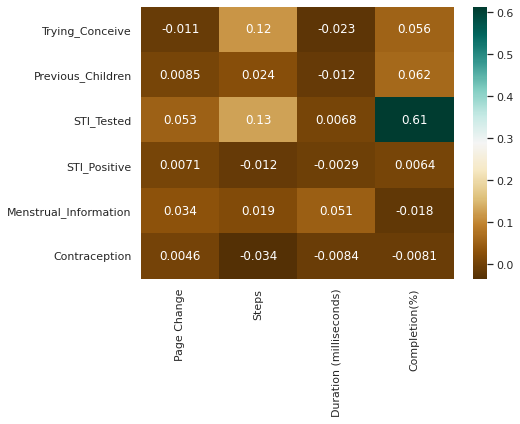

In [ ]:
#dfProfileLast & dfGeneral
plt.figure(figsize=(7,5))
result= dfProfileLast_DiffLastandSecond.corr()

result1 = result[['Page Change', 'Steps','Duration (milliseconds)', 'Completion(%)', 
              #     'Gender Change', 'Age Change',
              #  'Height Change',	'Weight Change', 'Smoking Change',	'Alcohol Consumption Change',
              #  'Trying Conceive Change',	'Trying Months Change', 'Previous Children Change',	'STI Tested Change',	'STI Positive Change',	
              #  'Menstrual Information Change',	'Sex Frequency Change', 'Sex Right Time Change',	'Contraception Change',	
              #  'AHW time spent','Smoking time spent','Alcohol time spent','Conceive time spent',
              #  'Month time spent','Children time spent','STI_Tested time spent','STI_Positive time spent',
              #  'Menstrual_Information time spent','Sex_Frequency time spent','Sex_Right_Time time spent',
              #  'Contraception time spent',
              #  'Age Diff_x','Height Diff_x', 'Weight Diff_x', 'Month Diff_x', 'Sex_Frequency Diff_x',
              #  'Age Diff_y', 'Height Diff_y', 'Weight Diff_y', 'Month Diff_y', 'Sex_Frequency Diff_y'
              ]].loc[[
                      # 'Gender','Step',
                      'Trying_Conceive',	'Previous_Children',	'STI_Tested',	'STI_Positive', 
                  'Menstrual_Information','Contraception']]
sns.heatmap(result1,cmap="BrBG",annot=True)



In [ ]:
plt.figure(figsize=(10,5))
result1 = result[['Page Change','Step','Duration (milliseconds)', 'Completion(%)']].loc[['Gender','Trying_Conceive',	'STI_Tested',	'STI_Positive']]
sns.heatmap(result1,cmap="BrBG",annot=True)

<Figure size 720x360 with 0 Axes>

NameError: ignored

<Figure size 720x360 with 0 Axes>

In [ ]:
pvalue = dfProfileLast_DiffLastandSecond[['Step','STI_Tested','Page Change', 'Completion(%)']].corr(method=pearsonr_pval)
pvalue1 = pvalue[['Step','STI_Tested']].loc[['Page Change', 'Completion(%)']]

pvalue1.round(decimals=4)

Step  STI_Tested
Page Change     0.0      0.0031
Completion(%)   0.0      0.0000

In [ ]:
#Data set dfProfileFirst & attribute
dfProfileFirst_General = pd.merge(dfProfileFirst,dfGeneral, on = 'Visitor_ID', how = 'left')
dfProfileFirst_DiffLast = pd.merge(dfProfileFirst_General[['Visitor_ID','Gender','Step','Trying_Conceive','Previous_Children', 'STI_Tested','STI_Positive', 
                                                         'Menstrual_Information', 'Contraception','Page Change', 'Steps', 'Duration (milliseconds)', 'Completion(%)',
                                                         'Gender Change', 'Age Change', 'Height Change', 'Weight Change', 'Smoking Change', 'Alcohol Consumption Change',
                                                         'Trying Conceive Change', 'Trying Months Change', 'Previous Children Change', 'STI Tested Change',
                                                         'STI Positive Change', 'Menstrual Information Change', 'Sex Frequency Change', 'Sex Right Time Change',
                                                         'Contraception Change', 'AHW time spent', 'Smoking time spent', 'Alcohol time spent', 'Conceive time spent',
                                                         'Month time spent', 'Children time spent', 'STI_Tested time spent', 'STI_Positive time spent', 
                                                         'Menstrual_Information time spent', 'Sex_Frequency time spent', 'Sex_Right_Time time spent', 
                                                         'Contraception time spent']],dfDiffFirstSecond[['Visitor_ID','Age Diff',	'Height Diff', 'Weight Diff',
                                                       'Smoking Diff','Alcohol Diff','Month Diff', 'Sex_Frequency Diff']], on = 'Visitor_ID', how = 'left')
dfProfileFirst_DiffLastandSecond = pd.merge(dfProfileFirst_DiffLast,dfDiffFirstLast[['Visitor_ID','Age Diff',	'Height Diff', 'Weight Diff',
                                                      'Smoking Diff','Alcohol Diff','Month Diff', 'Sex_Frequency Diff']], on = 'Visitor_ID', how = 'left')


#_x: first & second value; _y: first & last value
display(dfProfileFirst_DiffLastandSecond)

dfProfileFirst_DiffLastandSecond['Gender']=dfProfileFirst_DiffLastandSecond['Gender'].replace(["Men"],1)
dfProfileFirst_DiffLastandSecond['Gender']=dfProfileFirst_DiffLastandSecond['Gender'].replace(["Women"],0)

dfProfileFirst_DiffLastandSecond['Step']=dfProfileFirst_DiffLastandSecond['Step'].replace([1],0)
dfProfileFirst_DiffLastandSecond['Step']=dfProfileFirst_DiffLastandSecond['Step'].replace([2],1)

dfProfileFirst_DiffLastandSecond['Trying_Conceive']=dfProfileFirst_DiffLastandSecond['Trying_Conceive'].replace(["Yes"],1)
dfProfileFirst_DiffLastandSecond['Trying_Conceive']=dfProfileFirst_DiffLastandSecond['Trying_Conceive'].replace(["No"],0)

dfProfileFirst_DiffLastandSecond['Previous_Children']=dfProfileFirst_DiffLastandSecond['Previous_Children'].replace(["Yes"],1)
dfProfileFirst_DiffLastandSecond['Previous_Children']=dfProfileFirst_DiffLastandSecond['Previous_Children'].replace(["No"],0)

dfProfileFirst_DiffLastandSecond['STI_Tested']=dfProfileFirst_DiffLastandSecond['STI_Tested'].replace(["Yes"],1)
dfProfileFirst_DiffLastandSecond['STI_Tested']=dfProfileFirst_DiffLastandSecond['STI_Tested'].replace(["No"],0)

dfProfileFirst_DiffLastandSecond['STI_Positive']=dfProfileFirst_DiffLastandSecond['STI_Positive'].replace(["Yes"],1)
dfProfileFirst_DiffLastandSecond['STI_Positive']=dfProfileFirst_DiffLastandSecond['STI_Positive'].replace(["No"],0)

dfProfileFirst_DiffLastandSecond['Menstrual_Information']=dfProfileFirst_DiffLastandSecond['Menstrual_Information'].replace(["Yes"],1)
dfProfileFirst_DiffLastandSecond['Menstrual_Information']=dfProfileFirst_DiffLastandSecond['Menstrual_Information'].replace(["No"],0)

dfProfileFirst_DiffLastandSecond['Contraception']=dfProfileFirst_DiffLastandSecond['Contraception'].replace(["Yes"],1)
dfProfileFirst_DiffLastandSecond['Contraception']=dfProfileFirst_DiffLastandSecond['Contraception'].replace(["No"],0)

dfProfileFirst_DiffLastandSecond


Visitor_ID Gender  ...  Month Diff_y Sex_Frequency Diff_y
0     00052d764372f8e1    Men  ...           NaN                  NaN
1     0010038311a193ca  Women  ...           0.0                  0.0
2     001ad62ea7bffe81  Women  ...           0.0                  0.0
3     001f49b0bfe37865  Women  ...           0.0                  0.0
4     00274a3448b59cbd  Women  ...           0.0                  0.0
...                ...    ...  ...           ...                  ...
4125  ffbbfa8e0095fa45  Women  ...           0.0                -12.0
4126  ffc980a4b6d372c6  Women  ...           0.0                  0.0
4127  ffcf6cfd8c6aac98  Women  ...           NaN                  NaN
4128  ffd1a676c10e1bcf  Women  ...           0.0                  0.0
4129  ffd318dc96254aab  Women  ...           0.0                  0.0

[4130 rows x 54 columns]

Visitor_ID  Gender  ...  Month Diff_y  Sex_Frequency Diff_y
0     00052d764372f8e1       1  ...           NaN                   NaN
1     0010038311a193ca       0  ...           0.0                   0.0
2     001ad62ea7bffe81       0  ...           0.0                   0.0
3     001f49b0bfe37865       0  ...           0.0                   0.0
4     00274a3448b59cbd       0  ...           0.0                   0.0
...                ...     ...  ...           ...                   ...
4125  ffbbfa8e0095fa45       0  ...           0.0                 -12.0
4126  ffc980a4b6d372c6       0  ...           0.0                   0.0
4127  ffcf6cfd8c6aac98       0  ...           NaN                   NaN
4128  ffd1a676c10e1bcf       0  ...           0.0                   0.0
4129  ffd318dc96254aab       0  ...           0.0                   0.0

[4130 rows x 54 columns]

In [ ]:
#dfProfileFirst & dfGeneral
plt.figure(figsize=(40,5))
result= dfProfileFirst_DiffLastandSecond.corr()

result1 = result[['Page Change', 'Steps','Duration (milliseconds)', 'Completion(%)', 'Gender Change', 'Age Change',
               'Height Change',	'Weight Change', 'Smoking Change',	'Alcohol Consumption Change',
               'Trying Conceive Change',	'Trying Months Change', 'Previous Children Change',	'STI Tested Change',	'STI Positive Change',	
               'Menstrual Information Change',	'Sex Frequency Change', 'Sex Right Time Change',	'Contraception Change',	
               'AHW time spent','Smoking time spent','Alcohol time spent','Conceive time spent',
               'Month time spent','Children time spent','STI_Tested time spent','STI_Positive time spent',
               'Menstrual_Information time spent','Sex_Frequency time spent','Sex_Right_Time time spent',
               'Contraception time spent',
               'Age Diff_x','Height Diff_x', 'Weight Diff_x', 'Month Diff_x', 'Sex_Frequency Diff_x',
               'Age Diff_y', 'Height Diff_y', 'Weight Diff_y', 'Month Diff_y', 'Sex_Frequency Diff_y']].loc[['Gender','Step','Trying_Conceive',	'Previous_Children',	'STI_Tested',	'STI_Positive', 
                  'Menstrual_Information','Contraception']]
sns.heatmap(result1,cmap="BrBG",annot=True)

<Figure size 2880x360 with 0 Axes>

In [ ]:
#Categorial with more than 2 value
#Data set dfProfileFirst & attribute
dfProfileFirst_General2 = pd.merge(dfProfileFirst,dfGeneral, on = 'Visitor_ID', how = 'left')
dfProfileFirst_DiffLast2 = pd.merge(dfProfileFirst_General2[['Visitor_ID','Sex_Right_Time','Page Change', 'Steps', 'Duration (milliseconds)', 'Completion(%)',
                                                         'Gender Change', 'Age Change', 'Height Change', 'Weight Change', 'Smoking Change', 'Alcohol Consumption Change',
                                                         'Trying Conceive Change', 'Trying Months Change', 'Previous Children Change', 'STI Tested Change',
                                                         'STI Positive Change', 'Menstrual Information Change', 'Sex Frequency Change', 'Sex Right Time Change',
                                                         'Contraception Change', 'AHW time spent', 'Smoking time spent', 'Alcohol time spent', 'Conceive time spent',
                                                         'Month time spent', 'Children time spent', 'STI_Tested time spent', 'STI_Positive time spent', 
                                                         'Menstrual_Information time spent', 'Sex_Frequency time spent', 'Sex_Right_Time time spent', 
                                                         'Contraception time spent']],dfDiffFirstSecond[['Visitor_ID','Age Diff',	'Height Diff', 'Weight Diff',
                                                       'Smoking Diff','Alcohol Diff','Month Diff', 'Sex_Frequency Diff']], on = 'Visitor_ID', how = 'left')
dfProfileFirst_DiffLastandSecond2 = pd.merge(dfProfileFirst_DiffLast2,dfDiffFirstLast[['Visitor_ID','Age Diff',	'Height Diff', 'Weight Diff',
                                                      'Smoking Diff','Alcohol Diff','Month Diff', 'Sex_Frequency Diff']], on = 'Visitor_ID', how = 'left')


#_x: first & second value; _y: first & last value
dummies = pd.get_dummies(dfProfileFirst_DiffLastandSecond2[['Sex_Right_Time']])

dfProfileFirst_DiffLastandSecond2 = pd.concat([dfProfileFirst_DiffLastandSecond2, dummies], axis=1)

display(dfProfileFirst_DiffLastandSecond2)

#dfProfileFirst & dfGeneral
plt.figure(figsize=(40,5))
result= dfProfileFirst_DiffLastandSecond2.corr()

result1 = result[['Page Change', 'Steps','Duration (milliseconds)', 'Completion(%)', 'Gender Change', 'Age Change',
               'Height Change',	'Weight Change', 'Smoking Change',	'Alcohol Consumption Change',
               'Trying Conceive Change',	'Trying Months Change', 'Previous Children Change',	'STI Tested Change',	'STI Positive Change',	
               'Menstrual Information Change',	'Sex Frequency Change', 'Sex Right Time Change',	'Contraception Change',	
               'AHW time spent','Smoking time spent','Alcohol time spent','Conceive time spent',
               'Month time spent','Children time spent','STI_Tested time spent','STI_Positive time spent',
               'Menstrual_Information time spent','Sex_Frequency time spent','Sex_Right_Time time spent',
               'Contraception time spent',
               'Age Diff_x','Height Diff_x', 'Weight Diff_x', 'Month Diff_x', 'Sex_Frequency Diff_x',
               'Age Diff_y', 'Height Diff_y', 'Weight Diff_y', 'Month Diff_y', 'Sex_Frequency Diff_y']].loc[['Sex_Right_Time_No',
                                                                                                             'Sex_Right_Time_Unsure',
                                                                                                             'Sex_Right_Time_Yes']]
sns.heatmap(result1,cmap="BrBG",annot=True)

Visitor_ID  ... Sex_Right_Time_Yes
0     00052d764372f8e1  ...                  0
1     0010038311a193ca  ...                  0
2     001ad62ea7bffe81  ...                  0
3     001f49b0bfe37865  ...                  1
4     00274a3448b59cbd  ...                  0
...                ...  ...                ...
4125  ffbbfa8e0095fa45  ...                  0
4126  ffc980a4b6d372c6  ...                  0
4127  ffcf6cfd8c6aac98  ...                  0
4128  ffd1a676c10e1bcf  ...                  1
4129  ffd318dc96254aab  ...                  0

[4130 rows x 50 columns]

<Figure size 2880x360 with 0 Axes>

Visitor_ID  ... Sex_Right_Time_Yes
0     00052d764372f8e1  ...                  0
1     0010038311a193ca  ...                  0
2     001ad62ea7bffe81  ...                  0
3     001f49b0bfe37865  ...                  1
4     00274a3448b59cbd  ...                  0
...                ...  ...                ...
4125  ffbbfa8e0095fa45  ...                  0
4126  ffc980a4b6d372c6  ...                  0
4127  ffcf6cfd8c6aac98  ...                  0
4128  ffd1a676c10e1bcf  ...                  0
4129  ffd318dc96254aab  ...                  0

[4130 rows x 50 columns]

Visitor_ID  ... Sex_Right_Time_Yes
3     001f49b0bfe37865  ...                  1
4     00274a3448b59cbd  ...                  0
5     003f72c154cb8bc0  ...                  0
6     004cae2702ee4b5b  ...                  1
8     0062f3b8b224b562  ...                  0
...                ...  ...                ...
4124  ffb8cb55766e9f15  ...                  1
4125  ffbbfa8e0095fa45  ...                  0
4126  ffc980a4b6d372c6  ...                  0
4128  ffd1a676c10e1bcf  ...                  0
4129  ffd318dc96254aab  ...                  0

[3479 rows x 5 columns]

Visitor_ID  ... Sex_Right_Time_Yes
0     00052d764372f8e1  ...                  0
1     0010038311a193ca  ...                  0
2     001ad62ea7bffe81  ...                  0
3     001f49b0bfe37865  ...                  1
4     00274a3448b59cbd  ...                  0
...                ...  ...                ...
4125  ffbbfa8e0095fa45  ...                  0
4126  ffc980a4b6d372c6  ...                  0
4127  ffcf6cfd8c6aac98  ...                  0
4128  ffd1a676c10e1bcf  ...                  0
4129  ffd318dc96254aab  ...                  0

[4130 rows x 5 columns]

<Figure size 2880x360 with 0 Axes>

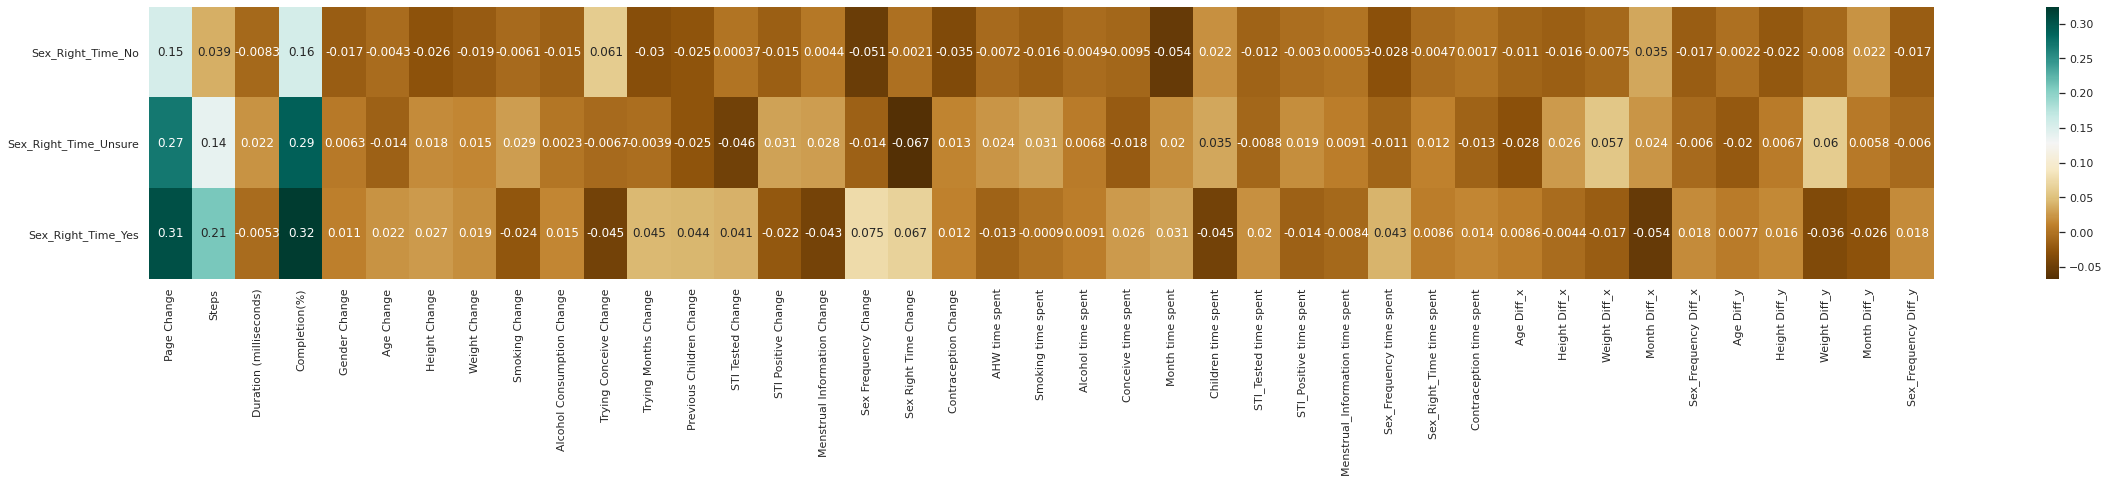

In [ ]:
#Categorial with more than 2 value
#Data set dfProfileLast & attribute
dfProfileLast_General2 = pd.merge(dfProfileLast,dfGeneral, on = 'Visitor_ID', how = 'left')
dfProfileLast_DiffLast2 = pd.merge(dfProfileLast_General2[['Visitor_ID','Sex_Right_Time','Page Change', 'Steps', 'Duration (milliseconds)', 'Completion(%)',
                                                         'Gender Change', 'Age Change', 'Height Change', 'Weight Change', 'Smoking Change', 'Alcohol Consumption Change',
                                                         'Trying Conceive Change', 'Trying Months Change', 'Previous Children Change', 'STI Tested Change',
                                                         'STI Positive Change', 'Menstrual Information Change', 'Sex Frequency Change', 'Sex Right Time Change',
                                                         'Contraception Change', 'AHW time spent', 'Smoking time spent', 'Alcohol time spent', 'Conceive time spent',
                                                         'Month time spent', 'Children time spent', 'STI_Tested time spent', 'STI_Positive time spent', 
                                                         'Menstrual_Information time spent', 'Sex_Frequency time spent', 'Sex_Right_Time time spent', 
                                                         'Contraception time spent']],dfDiffFirstSecond[['Visitor_ID','Age Diff',	'Height Diff', 'Weight Diff',
                                                       'Smoking Diff','Alcohol Diff','Month Diff', 'Sex_Frequency Diff']], on = 'Visitor_ID', how = 'left')
dfProfileLast_DiffLastandSecond2 = pd.merge(dfProfileLast_DiffLast2,dfDiffFirstLast[['Visitor_ID','Age Diff',	'Height Diff', 'Weight Diff',
                                                      'Smoking Diff','Alcohol Diff','Month Diff', 'Sex_Frequency Diff']], on = 'Visitor_ID', how = 'left')

#_x: first & second value; _y: first & last value
dummies = pd.get_dummies(dfProfileLast_DiffLastandSecond2[['Sex_Right_Time']])

dfProfileLast_DiffLastandSecond2 = pd.concat([dfProfileLast_DiffLastandSecond2, dummies], axis=1)

display(dfProfileLast_DiffLastandSecond2)

# dfdisplay = dfProfileLast_DiffLastandSecond2[['Visitor_ID','Sex_Right_Time']]
# display(dfdisplay)
dfdisplay2 = dfProfileLast_DiffLastandSecond2[['Visitor_ID','Sex_Right_Time','Sex_Right_Time_No', 'Sex_Right_Time_Unsure', 'Sex_Right_Time_Yes']]
dfdisplay2.loc[dfdisplay2['Sex_Right_Time'].notnull()]
display(dfdisplay2)

#dfProfileFirst & dfGeneral
plt.figure(figsize=(40,5))
result= dfProfileLast_DiffLastandSecond2.corr()

result1 = result[['Page Change', 'Steps','Duration (milliseconds)', 'Completion(%)', 'Gender Change', 'Age Change',
               'Height Change',	'Weight Change', 'Smoking Change',	'Alcohol Consumption Change',
               'Trying Conceive Change',	'Trying Months Change', 'Previous Children Change',	'STI Tested Change',	'STI Positive Change',	
               'Menstrual Information Change',	'Sex Frequency Change', 'Sex Right Time Change',	'Contraception Change',	
               'AHW time spent','Smoking time spent','Alcohol time spent','Conceive time spent',
               'Month time spent','Children time spent','STI_Tested time spent','STI_Positive time spent',
               'Menstrual_Information time spent','Sex_Frequency time spent','Sex_Right_Time time spent',
               'Contraception time spent',
               'Age Diff_x','Height Diff_x', 'Weight Diff_x', 'Month Diff_x', 'Sex_Frequency Diff_x',
               'Age Diff_y', 'Height Diff_y', 'Weight Diff_y', 'Month Diff_y', 'Sex_Frequency Diff_y']].loc[['Sex_Right_Time_No',
                                                                                                             'Sex_Right_Time_Unsure',
                                                                                                             'Sex_Right_Time_Yes']]
sns.heatmap(result1,cmap="BrBG",annot=True)

Visitor_ID  ...  Contraception Direction_Positive
0     00052d764372f8e1  ...                                 0
1     0010038311a193ca  ...                                 0
2     001ad62ea7bffe81  ...                                 0
3     001f49b0bfe37865  ...                                 0
4     00274a3448b59cbd  ...                                 0
...                ...  ...                               ...
4125  ffbbfa8e0095fa45  ...                                 0
4126  ffc980a4b6d372c6  ...                                 0
4127  ffcf6cfd8c6aac98  ...                                 0
4128  ffd1a676c10e1bcf  ...                                 0
4129  ffd318dc96254aab  ...                                 0

[4130 rows x 64 columns]

<Figure size 2880x360 with 0 Axes>

Age  Smoking New  Alcohol New
Age Direction_No change      0.0000       0.0000       0.0000
Age Direction_Positive       0.0000       0.0001       0.0035
Smoking Direction_Negative   0.0000       0.0000       0.0000
Smoking Direction_No change  0.0000       0.0000       0.0000
Alcohol Direction_Negative   0.8256       0.0000       0.0000
Alcohol Direction_No change  0.3095       0.0000       0.0000

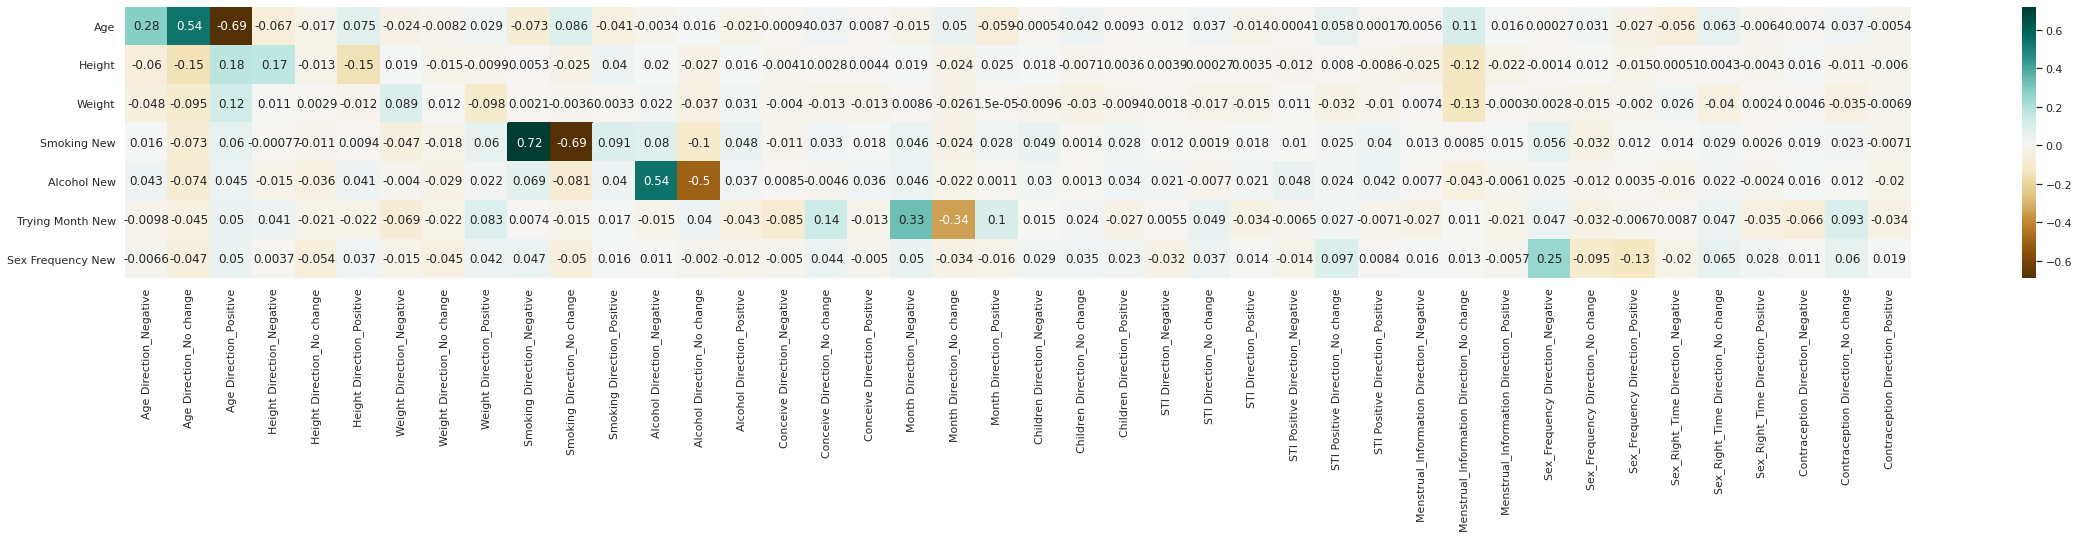

In [ ]:
#Categorial with more than 2 value - independent numeric varibles & dependent categorial variables
#Data set dfProfileFirst & first-second attribute
dfProfileFirst_General3 = pd.merge(dfProfileFirst,dfGeneral, on = 'Visitor_ID', how = 'left')

dfDiffFirstSecond2 = dfDiffFirstSecond[['Visitor_ID','Age Direction','Height Direction',
                                                            'Weight Direction','Smoking Direction','Alcohol Direction','Conceive Direction','Month Direction',
                                                            'Children Direction','STI Direction','STI Positive Direction','Menstrual_Information Direction',
                                                            'Sex_Frequency Direction','Sex_Right_Time Direction',
                                                            'Contraception Direction']]
dfDiffFirstSecond2 = dfDiffFirstSecond2.replace([1,0.5],"Positive")
dfDiffFirstSecond2 = dfDiffFirstSecond2.replace([-1,-0.5],"Negative")
dfDiffFirstSecond2 = dfDiffFirstSecond2.replace(0,"No change")   

dfProfileFirst_DiffLast3 = pd.merge(dfProfileFirst_General3[['Visitor_ID','Age','Height','Weight','Smoking New','Alcohol New','Trying Month New',
                                                             'Sex Frequency New']],dfDiffFirstSecond2[['Visitor_ID','Age Direction','Height Direction',
                                                            'Weight Direction','Smoking Direction','Alcohol Direction','Conceive Direction','Month Direction',
                                                            'Children Direction','STI Direction','STI Positive Direction','Menstrual_Information Direction',
                                                            'Sex_Frequency Direction','Sex_Right_Time Direction',
                                                            'Contraception Direction']], on = 'Visitor_ID', how = 'left')

dummies = pd.get_dummies(dfProfileFirst_DiffLast3[['Age Direction','Height Direction',
                                                            'Weight Direction','Smoking Direction','Alcohol Direction','Conceive Direction','Month Direction',
                                                            'Children Direction','STI Direction','STI Positive Direction','Menstrual_Information Direction',
                                                            'Sex_Frequency Direction','Sex_Right_Time Direction',
                                                            'Contraception Direction']])

dfProfileFirst_DiffLast3 = pd.concat([dfProfileFirst_DiffLast3, dummies], axis=1)

display(dfProfileFirst_DiffLast3)

#dfProfileFirst & dfGeneral
plt.figure(figsize=(40,5))
result= dfProfileFirst_DiffLast3.corr()

result1 = result[['Age Direction_Negative',	'Age Direction_No change',	'Age Direction_Positive',	'Height Direction_Negative',
                  'Height Direction_No change',	'Height Direction_Positive',	'Weight Direction_Negative',	'Weight Direction_No change',
                  'Weight Direction_Positive',	'Smoking Direction_Negative',	'Smoking Direction_No change',	'Smoking Direction_Positive',
                  'Alcohol Direction_Negative',	'Alcohol Direction_No change',	'Alcohol Direction_Positive',	'Conceive Direction_Negative',
                  'Conceive Direction_No change',	'Conceive Direction_Positive',	'Month Direction_Negative',	'Month Direction_No change',
                  'Month Direction_Positive',	'Children Direction_Negative',	'Children Direction_No change',	'Children Direction_Positive',
                  'STI Direction_Negative',	'STI Direction_No change',	'STI Direction_Positive',	'STI Positive Direction_Negative',	
                  'STI Positive Direction_No change',	'STI Positive Direction_Positive',	'Menstrual_Information Direction_Negative',
                  'Menstrual_Information Direction_No change',	'Menstrual_Information Direction_Positive',	'Sex_Frequency Direction_Negative',
                  'Sex_Frequency Direction_No change',	'Sex_Frequency Direction_Positive',	'Sex_Right_Time Direction_Negative',	
                  'Sex_Right_Time Direction_No change',	'Sex_Right_Time Direction_Positive',	'Contraception Direction_Negative',
                  'Contraception Direction_No change',	'Contraception Direction_Positive']].loc[['Age','Height','Weight','Smoking New',
                                                                                                 'Alcohol New','Trying Month New','Sex Frequency New']]
sns.heatmap(result1,cmap="BrBG",annot=True)

pvalue = dfProfileFirst_DiffLast3[['Age','Smoking New','Alcohol New','Age Direction_No change','Age Direction_Positive','Smoking Direction_Negative','Smoking Direction_No change',
                                   'Alcohol Direction_Negative',	'Alcohol Direction_No change']].corr(method=pearsonr_pval)
pvalue1 = pvalue[['Age','Smoking New','Alcohol New']].loc[['Age Direction_No change','Age Direction_Positive','Smoking Direction_Negative','Smoking Direction_No change',
                                   'Alcohol Direction_Negative',	'Alcohol Direction_No change']]

pvalue1.round(decimals=4)

Visitor_ID  ...  Contraception Direction_Positive
0     00052d764372f8e1  ...                                 0
1     0010038311a193ca  ...                                 0
2     001ad62ea7bffe81  ...                                 0
3     001f49b0bfe37865  ...                                 0
4     00274a3448b59cbd  ...                                 0
...                ...  ...                               ...
4125  ffbbfa8e0095fa45  ...                                 0
4126  ffc980a4b6d372c6  ...                                 0
4127  ffcf6cfd8c6aac98  ...                                 0
4128  ffd1a676c10e1bcf  ...                                 0
4129  ffd318dc96254aab  ...                                 0

[4130 rows x 64 columns]

<Figure size 2880x360 with 0 Axes>

Age  Smoking New  Alcohol New
Age Direction_No change      0.0000          0.0       0.0000
Age Direction_Positive       0.0000          0.0       0.0001
Smoking Direction_Negative   0.0000          0.0       0.0000
Smoking Direction_No change  0.0000          0.0       0.0000
Alcohol Direction_Negative   0.1649          0.0       0.0000
Alcohol Direction_No change  0.3095          0.0       0.0000

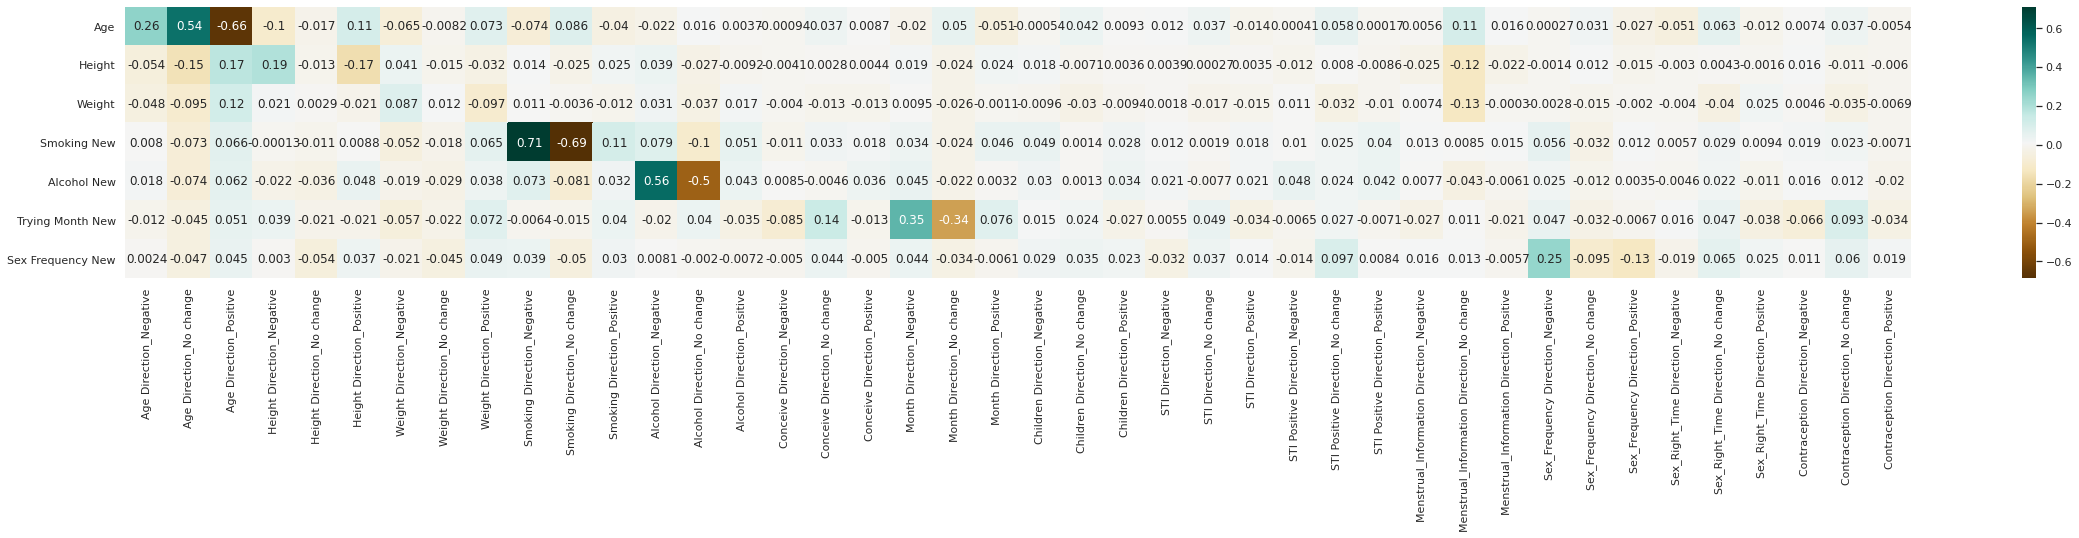

In [ ]:
#Categorial with more than 2 value - independent numeric varibles & dependent categorial variables
#Data set dfProfileFirst & last-second attribute
dfProfileFirst_General3 = pd.merge(dfProfileFirst,dfGeneral, on = 'Visitor_ID', how = 'left')

dfDiffFirstLast2 = dfDiffFirstLast[['Visitor_ID','Age Direction','Height Direction',
                                                            'Weight Direction','Smoking Direction','Alcohol Direction','Conceive Direction','Month Direction',
                                                            'Children Direction','STI Direction','STI Positive Direction','Menstrual_Information Direction',
                                                            'Sex_Frequency Direction','Sex_Right_Time Direction',
                                                            'Contraception Direction']]
dfDiffFirstLast2 = dfDiffFirstLast2.replace([1,0.5],"Positive")
dfDiffFirstLast2 = dfDiffFirstLast2.replace([-1,-0.5],"Negative")
dfDiffFirstLast2 = dfDiffFirstLast2.replace(0,"No change")   

dfProfileFirst_DiffLast4 = pd.merge(dfProfileFirst_General3[['Visitor_ID','Age','Height','Weight','Smoking New','Alcohol New','Trying Month New',
                                                             'Sex Frequency New']],dfDiffFirstLast2[['Visitor_ID','Age Direction','Height Direction',
                                                            'Weight Direction','Smoking Direction','Alcohol Direction','Conceive Direction','Month Direction',
                                                            'Children Direction','STI Direction','STI Positive Direction','Menstrual_Information Direction',
                                                            'Sex_Frequency Direction','Sex_Right_Time Direction',
                                                            'Contraception Direction']], on = 'Visitor_ID', how = 'left')

dummies = pd.get_dummies(dfProfileFirst_DiffLast4[['Age Direction','Height Direction',
                                                            'Weight Direction','Smoking Direction','Alcohol Direction','Conceive Direction','Month Direction',
                                                            'Children Direction','STI Direction','STI Positive Direction','Menstrual_Information Direction',
                                                            'Sex_Frequency Direction','Sex_Right_Time Direction',
                                                            'Contraception Direction']])

dfProfileFirst_DiffLast4 = pd.concat([dfProfileFirst_DiffLast4, dummies], axis=1)

display(dfProfileFirst_DiffLast4)

#dfProfileFirst & dfGeneral
plt.figure(figsize=(40,5))
result= dfProfileFirst_DiffLast4.corr()

result1 = result[['Age Direction_Negative',	'Age Direction_No change',	'Age Direction_Positive',	'Height Direction_Negative',
                  'Height Direction_No change',	'Height Direction_Positive',	'Weight Direction_Negative',	'Weight Direction_No change',
                  'Weight Direction_Positive',	'Smoking Direction_Negative',	'Smoking Direction_No change',	'Smoking Direction_Positive',
                  'Alcohol Direction_Negative',	'Alcohol Direction_No change',	'Alcohol Direction_Positive',	'Conceive Direction_Negative',
                  'Conceive Direction_No change',	'Conceive Direction_Positive',	'Month Direction_Negative',	'Month Direction_No change',
                  'Month Direction_Positive',	'Children Direction_Negative',	'Children Direction_No change',	'Children Direction_Positive',
                  'STI Direction_Negative',	'STI Direction_No change',	'STI Direction_Positive',	'STI Positive Direction_Negative',	
                  'STI Positive Direction_No change',	'STI Positive Direction_Positive',	'Menstrual_Information Direction_Negative',
                  'Menstrual_Information Direction_No change',	'Menstrual_Information Direction_Positive',	'Sex_Frequency Direction_Negative',
                  'Sex_Frequency Direction_No change',	'Sex_Frequency Direction_Positive',	'Sex_Right_Time Direction_Negative',	
                  'Sex_Right_Time Direction_No change',	'Sex_Right_Time Direction_Positive',	'Contraception Direction_Negative',
                  'Contraception Direction_No change',	'Contraception Direction_Positive']].loc[['Age','Height','Weight','Smoking New',
                                                                                                 'Alcohol New','Trying Month New','Sex Frequency New']]
sns.heatmap(result1,cmap="BrBG",annot=True)

pvalue = dfProfileFirst_DiffLast4[['Age','Smoking New','Alcohol New','Age Direction_No change','Age Direction_Positive','Smoking Direction_Negative','Smoking Direction_No change',
                                   'Alcohol Direction_Negative',	'Alcohol Direction_No change']].corr(method=pearsonr_pval)
pvalue1 = pvalue[['Age','Smoking New','Alcohol New']].loc[['Age Direction_No change','Age Direction_Positive','Smoking Direction_Negative','Smoking Direction_No change',
                                   'Alcohol Direction_Negative',	'Alcohol Direction_No change']]

pvalue1.round(decimals=4)

In [ ]:
plt.figure(figsize=(10,5))
result1 = result[['Age Direction_Negative',	'Age Direction_No change',	'Age Direction_Positive']].loc[['Age','Height','Weight','Smoking New',
                                                                                                 'Alcohol New','Trying Month New','Sex Frequency New']]
sns.heatmap(result1,cmap="BrBG",annot=True)

<Figure size 720x360 with 0 Axes>

Visitor_ID  ...  Contraception Direction_Positive
0     00052d764372f8e1  ...                                 0
1     0010038311a193ca  ...                                 0
2     001ad62ea7bffe81  ...                                 0
3     001f49b0bfe37865  ...                                 0
4     00274a3448b59cbd  ...                                 0
...                ...  ...                               ...
4125  ffbbfa8e0095fa45  ...                                 0
4126  ffc980a4b6d372c6  ...                                 0
4127  ffcf6cfd8c6aac98  ...                                 0
4128  ffd1a676c10e1bcf  ...                                 0
4129  ffd318dc96254aab  ...                                 0

[4130 rows x 64 columns]

<Figure size 2880x360 with 0 Axes>

Age  Smoking New  Alcohol New
Age Direction_No change      0.0000       0.0051       0.0034
Age Direction_Positive       0.0000       0.1149       0.7332
Smoking Direction_Negative   0.0366       0.0002       0.4606
Smoking Direction_No change  0.0661       0.0000       0.3557
Alcohol Direction_Negative   0.7822       0.2672       0.0000
Alcohol Direction_No change  0.5184       0.0009       0.0000

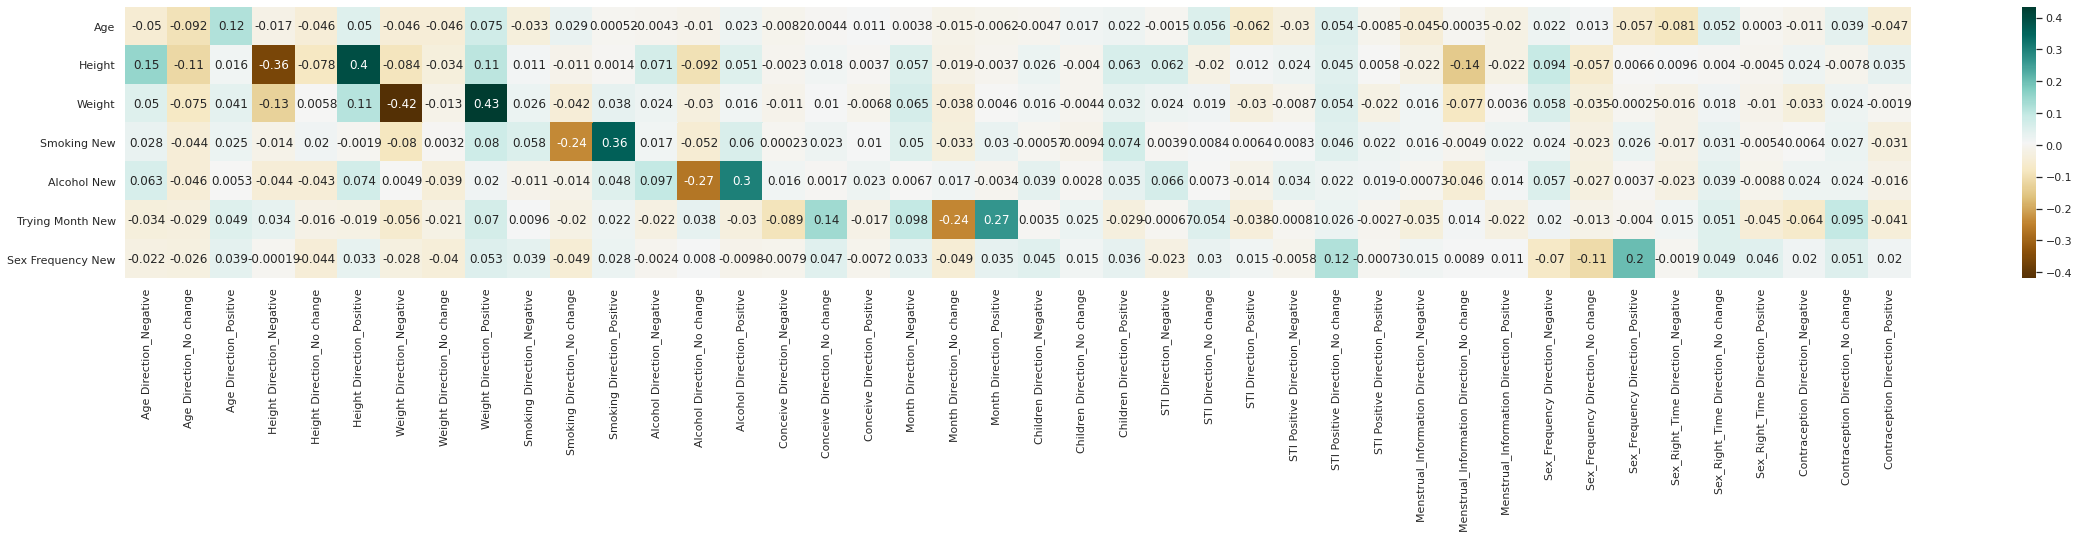

In [ ]:
#Categorial with more than 2 value - independent numeric varibles & dependent categorial variables
#Data set dfProfileLast & second-first attribute
dfProfileLast_General3 = pd.merge(dfProfileLast,dfGeneral, on = 'Visitor_ID', how = 'left')

dfDiffFirstSecond3 = dfDiffFirstSecond[['Visitor_ID','Age Direction','Height Direction',
                                                            'Weight Direction','Smoking Direction','Alcohol Direction','Conceive Direction','Month Direction',
                                                            'Children Direction','STI Direction','STI Positive Direction','Menstrual_Information Direction',
                                                            'Sex_Frequency Direction','Sex_Right_Time Direction',
                                                            'Contraception Direction']]
dfDiffFirstSecond3 = dfDiffFirstSecond3.replace([1,0.5],"Positive")
dfDiffFirstSecond3 = dfDiffFirstSecond3.replace([-1,-0.5],"Negative")
dfDiffFirstSecond3 = dfDiffFirstSecond3.replace(0,"No change")   

dfProfileLast_DiffSecond3 = pd.merge(dfProfileLast_General3[['Visitor_ID','Age','Height','Weight','Smoking New','Alcohol New','Trying Month New',
                                                             'Sex Frequency New']],dfDiffFirstSecond3[['Visitor_ID','Age Direction','Height Direction',
                                                            'Weight Direction','Smoking Direction','Alcohol Direction','Conceive Direction','Month Direction',
                                                            'Children Direction','STI Direction','STI Positive Direction','Menstrual_Information Direction',
                                                            'Sex_Frequency Direction','Sex_Right_Time Direction',
                                                            'Contraception Direction']], on = 'Visitor_ID', how = 'left')

dummies = pd.get_dummies(dfProfileLast_DiffSecond3[['Age Direction','Height Direction',
                                                            'Weight Direction','Smoking Direction','Alcohol Direction','Conceive Direction','Month Direction',
                                                            'Children Direction','STI Direction','STI Positive Direction','Menstrual_Information Direction',
                                                            'Sex_Frequency Direction','Sex_Right_Time Direction',
                                                            'Contraception Direction']])

dfProfileLast_DiffSecond3 = pd.concat([dfProfileLast_DiffSecond3, dummies], axis=1)

display(dfProfileLast_DiffSecond3)

#dfProfileFirst & dfGeneral
plt.figure(figsize=(40,5))
result= dfProfileLast_DiffSecond3.corr()

result1 = result[['Age Direction_Negative',	'Age Direction_No change',	'Age Direction_Positive',	'Height Direction_Negative',
                  'Height Direction_No change',	'Height Direction_Positive',	'Weight Direction_Negative',	'Weight Direction_No change',
                  'Weight Direction_Positive',	'Smoking Direction_Negative',	'Smoking Direction_No change',	'Smoking Direction_Positive',
                  'Alcohol Direction_Negative',	'Alcohol Direction_No change',	'Alcohol Direction_Positive',	'Conceive Direction_Negative',
                  'Conceive Direction_No change',	'Conceive Direction_Positive',	'Month Direction_Negative',	'Month Direction_No change',
                  'Month Direction_Positive',	'Children Direction_Negative',	'Children Direction_No change',	'Children Direction_Positive',
                  'STI Direction_Negative',	'STI Direction_No change',	'STI Direction_Positive',	'STI Positive Direction_Negative',	
                  'STI Positive Direction_No change',	'STI Positive Direction_Positive',	'Menstrual_Information Direction_Negative',
                  'Menstrual_Information Direction_No change',	'Menstrual_Information Direction_Positive',	'Sex_Frequency Direction_Negative',
                  'Sex_Frequency Direction_No change',	'Sex_Frequency Direction_Positive',	'Sex_Right_Time Direction_Negative',	
                  'Sex_Right_Time Direction_No change',	'Sex_Right_Time Direction_Positive',	'Contraception Direction_Negative',
                  'Contraception Direction_No change',	'Contraception Direction_Positive']].loc[['Age','Height','Weight','Smoking New',
                                                                                                 'Alcohol New','Trying Month New','Sex Frequency New']]
sns.heatmap(result1,cmap="BrBG",annot=True)

pvalue = dfProfileLast_DiffSecond3[['Age','Smoking New','Alcohol New','Age Direction_No change','Age Direction_Positive','Smoking Direction_Negative','Smoking Direction_No change',
                                   'Alcohol Direction_Negative',	'Alcohol Direction_No change']].corr(method=pearsonr_pval)
pvalue1 = pvalue[['Age','Smoking New','Alcohol New']].loc[['Age Direction_No change','Age Direction_Positive','Smoking Direction_Negative','Smoking Direction_No change',
                                   'Alcohol Direction_Negative',	'Alcohol Direction_No change']]

pvalue1.round(decimals=4)

Visitor_ID  ...  Contraception Direction_Positive
0     00052d764372f8e1  ...                                 0
1     0010038311a193ca  ...                                 0
2     001ad62ea7bffe81  ...                                 0
3     001f49b0bfe37865  ...                                 0
4     00274a3448b59cbd  ...                                 0
...                ...  ...                               ...
4125  ffbbfa8e0095fa45  ...                                 0
4126  ffc980a4b6d372c6  ...                                 0
4127  ffcf6cfd8c6aac98  ...                                 0
4128  ffd1a676c10e1bcf  ...                                 0
4129  ffd318dc96254aab  ...                                 0

[4130 rows x 64 columns]

<Figure size 2880x360 with 0 Axes>

Height  Weight
Height Direction_Negative     0.0     0.0
Height Direction_Positive     0.0     0.0
Weight Direction_Negative     0.0     0.0
Weight Direction_Positive     0.0     0.0

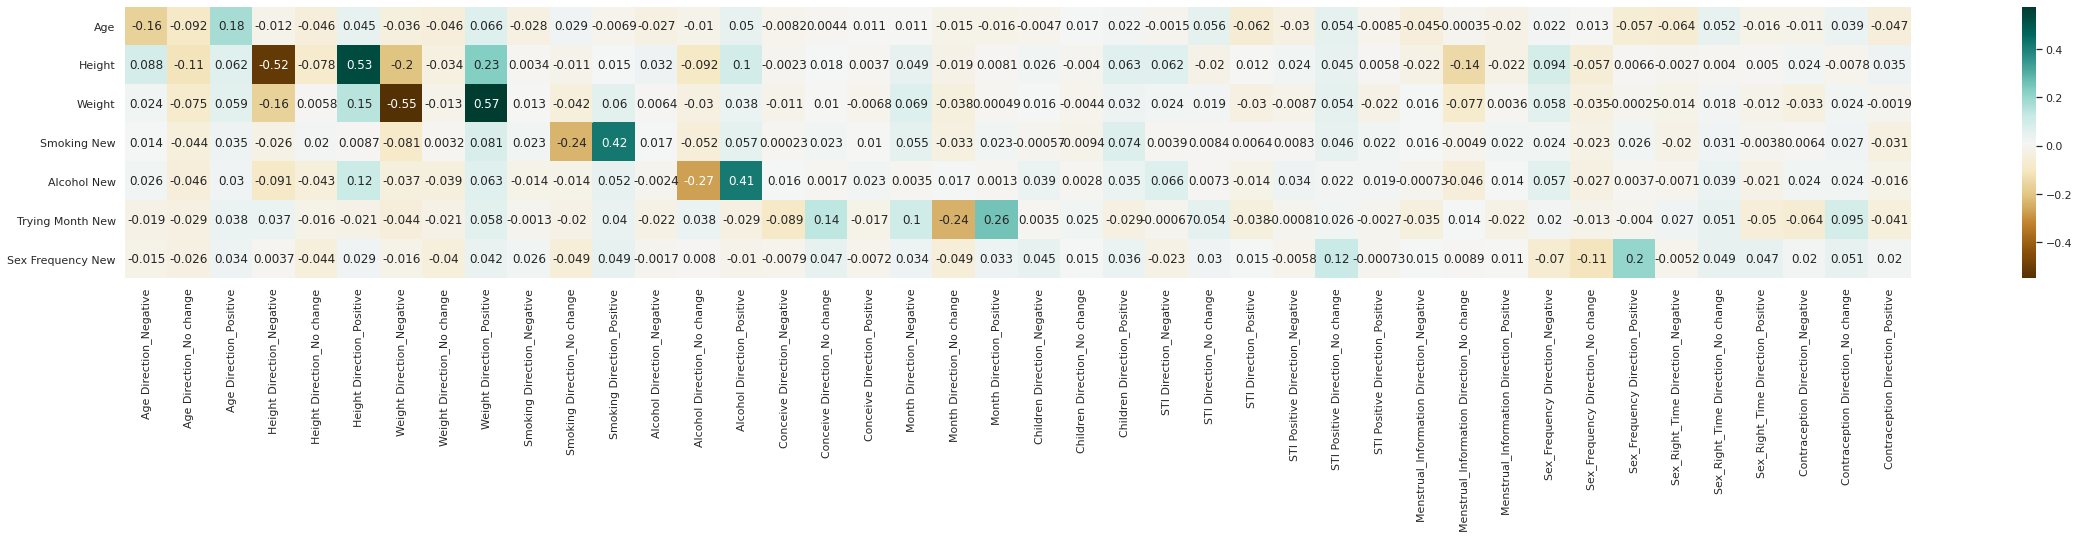

In [ ]:
#Categorial with more than 2 value - independent numeric varibles & dependent categorial variables
#Data set dfProfileLast & last-first attribute
dfProfileLast_General3 = pd.merge(dfProfileLast,dfGeneral, on = 'Visitor_ID', how = 'left')

dfDiffFirstLast3 = dfDiffFirstLast[['Visitor_ID','Age Direction','Height Direction',
                                                            'Weight Direction','Smoking Direction','Alcohol Direction','Conceive Direction','Month Direction',
                                                            'Children Direction','STI Direction','STI Positive Direction','Menstrual_Information Direction',
                                                            'Sex_Frequency Direction','Sex_Right_Time Direction',
                                                            'Contraception Direction']]
dfDiffFirstLast3 = dfDiffFirstLast3.replace([1,0.5],"Positive")
dfDiffFirstLast3 = dfDiffFirstLast3.replace([-1,-0.5],"Negative")
dfDiffFirstLast3 = dfDiffFirstLast3.replace(0,"No change")   

dfProfileLast_DiffLast3 = pd.merge(dfProfileLast_General3[['Visitor_ID','Age','Height','Weight','Smoking New','Alcohol New','Trying Month New',
                                                             'Sex Frequency New']],dfDiffFirstLast3[['Visitor_ID','Age Direction','Height Direction',
                                                            'Weight Direction','Smoking Direction','Alcohol Direction','Conceive Direction','Month Direction',
                                                            'Children Direction','STI Direction','STI Positive Direction','Menstrual_Information Direction',
                                                            'Sex_Frequency Direction','Sex_Right_Time Direction',
                                                            'Contraception Direction']], on = 'Visitor_ID', how = 'left')

dummies = pd.get_dummies(dfProfileLast_DiffLast3[['Age Direction','Height Direction',
                                                            'Weight Direction','Smoking Direction','Alcohol Direction','Conceive Direction','Month Direction',
                                                            'Children Direction','STI Direction','STI Positive Direction','Menstrual_Information Direction',
                                                            'Sex_Frequency Direction','Sex_Right_Time Direction',
                                                            'Contraception Direction']])

dfProfileLast_DiffLast3 = pd.concat([dfProfileLast_DiffLast3, dummies], axis=1)

display(dfProfileLast_DiffLast3)

#dfProfileFirst & dfGeneral
plt.figure(figsize=(40,5))
result= dfProfileLast_DiffLast3.corr()

result1 = result[['Age Direction_Negative',	'Age Direction_No change',	'Age Direction_Positive',	'Height Direction_Negative',
                  'Height Direction_No change',	'Height Direction_Positive',	'Weight Direction_Negative',	'Weight Direction_No change',
                  'Weight Direction_Positive',	'Smoking Direction_Negative',	'Smoking Direction_No change',	'Smoking Direction_Positive',
                  'Alcohol Direction_Negative',	'Alcohol Direction_No change',	'Alcohol Direction_Positive',	'Conceive Direction_Negative',
                  'Conceive Direction_No change',	'Conceive Direction_Positive',	'Month Direction_Negative',	'Month Direction_No change',
                  'Month Direction_Positive',	'Children Direction_Negative',	'Children Direction_No change',	'Children Direction_Positive',
                  'STI Direction_Negative',	'STI Direction_No change',	'STI Direction_Positive',	'STI Positive Direction_Negative',	
                  'STI Positive Direction_No change',	'STI Positive Direction_Positive',	'Menstrual_Information Direction_Negative',
                  'Menstrual_Information Direction_No change',	'Menstrual_Information Direction_Positive',	'Sex_Frequency Direction_Negative',
                  'Sex_Frequency Direction_No change',	'Sex_Frequency Direction_Positive',	'Sex_Right_Time Direction_Negative',	
                  'Sex_Right_Time Direction_No change',	'Sex_Right_Time Direction_Positive',	'Contraception Direction_Negative',
                  'Contraception Direction_No change',	'Contraception Direction_Positive']].loc[['Age','Height','Weight','Smoking New',
                                                                                                 'Alcohol New','Trying Month New','Sex Frequency New']]
sns.heatmap(result1,cmap="BrBG",annot=True)

pvalue = dfProfileLast_DiffLast3[['Height','Weight','Height Direction_Negative','Height Direction_Positive',
                                  'Weight Direction_Negative','Weight Direction_Positive']].corr(method=pearsonr_pval)
pvalue1 = pvalue[['Height','Weight']].loc[['Height Direction_Negative','Height Direction_Positive',
                                  'Weight Direction_Negative','Weight Direction_Positive']]

pvalue1.round(decimals=4)